# DSCI 303 – Project 04
### Adam Eccles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
In this section, we will load the data into a DataFrame, and will explore the structure of the data set.

In [2]:
diamonds = pd.read_csv('diamonds.txt', delimiter='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


We will now determine the size of the dataset using the `.shape` attribute.

In [3]:
diamonds.shape

(53940, 10)

We will now inspect the distribution of the columns in diamonds. 

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
We will start by viewing information about the 5 most expensive diamonds in the dataset.

In [5]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


We will start by viewing information about the 5 least expensive diamonds in the dataset.

In [6]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will now view the information about the 5 largest diamonds in the dataset with an Ideal cut.


In [7]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Ideal'].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


We will now view the information about the 5 largest diamonds in the dataset with a Fair cut.


In [8]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
We will be creating lists to specify the order for each of the three categorical variables.


In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

We will now use these lists to communicate to Pandas the correct order for the
levels of the three categorical variables. 

In [10]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_levels, ordered=True)
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=cut_levels, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'], categories=color_levels, ordered=True)

We will now create lists of named colors to serve as palettes to be used for
visualizations later in the notebook.

In [11]:
clarity_pal = ['lightgreen', 'mediumseagreen', 'seagreen', 'teal', 'cadetblue', 'steelblue', 'royalblue', 'darkblue']
cut_pal = ['lightyellow', 'khaki', 'gold', 'orange', 'red']
color_pal = ['lightyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red']

## Part 4: Displaying Counts for Categorical Variables
We will start by counting the number of diamonds for each level of cut.

In [12]:
diamonds['cut'].value_counts().sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

We will now count the number of diamonds for each level of the `color` variable.

In [13]:
diamonds['color'].value_counts().sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

We will now count the number of diamonds for each level of the `clarity` variable.

In [14]:
diamonds['clarity'].value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat
We will now explore the relationship between the price and carat attributes by generating scatter plots.

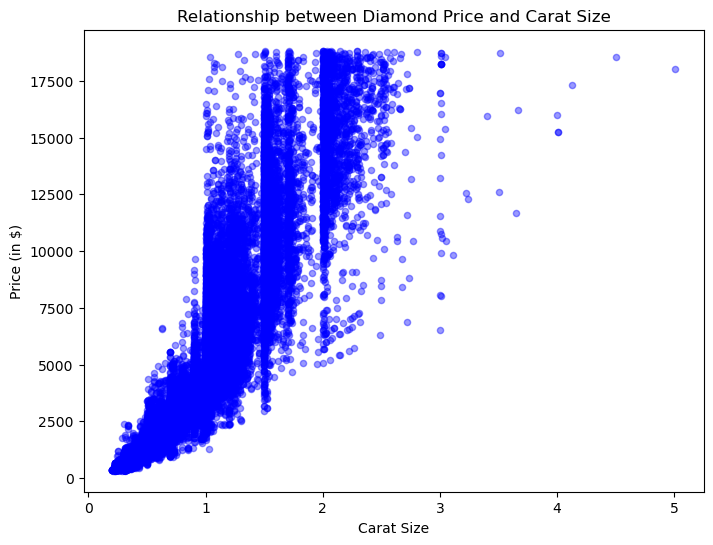

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color='blue')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

We will now reproduce the scatterplot from above but color the points according to their clarity levels.

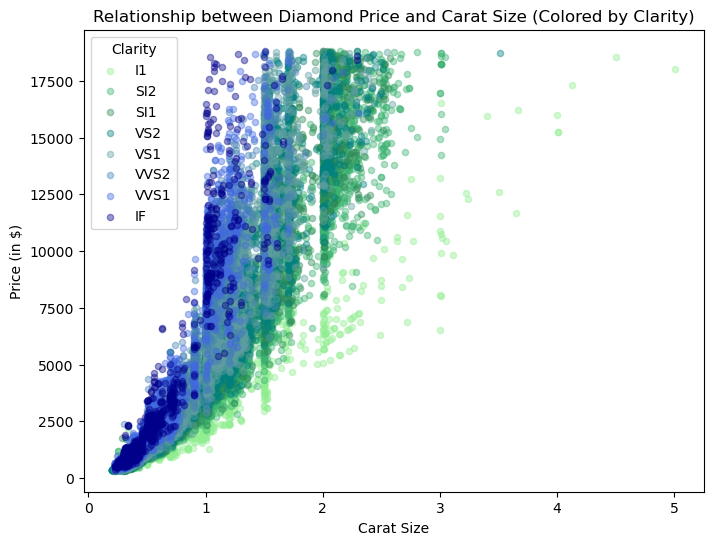

In [16]:
plt.figure(figsize=(8, 6))

for i, clarity in enumerate(clarity_levels):
    subset = diamonds[diamonds['clarity'] == clarity]
    plt.scatter(subset['carat'], subset['price'], s=20, alpha=0.4, label=clarity, color=clarity_pal[i])

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size (Colored by Clarity)')
plt.legend(title="Clarity")
plt.show()


We will now separate the points for each of the eight clarity levels into its own subplot.

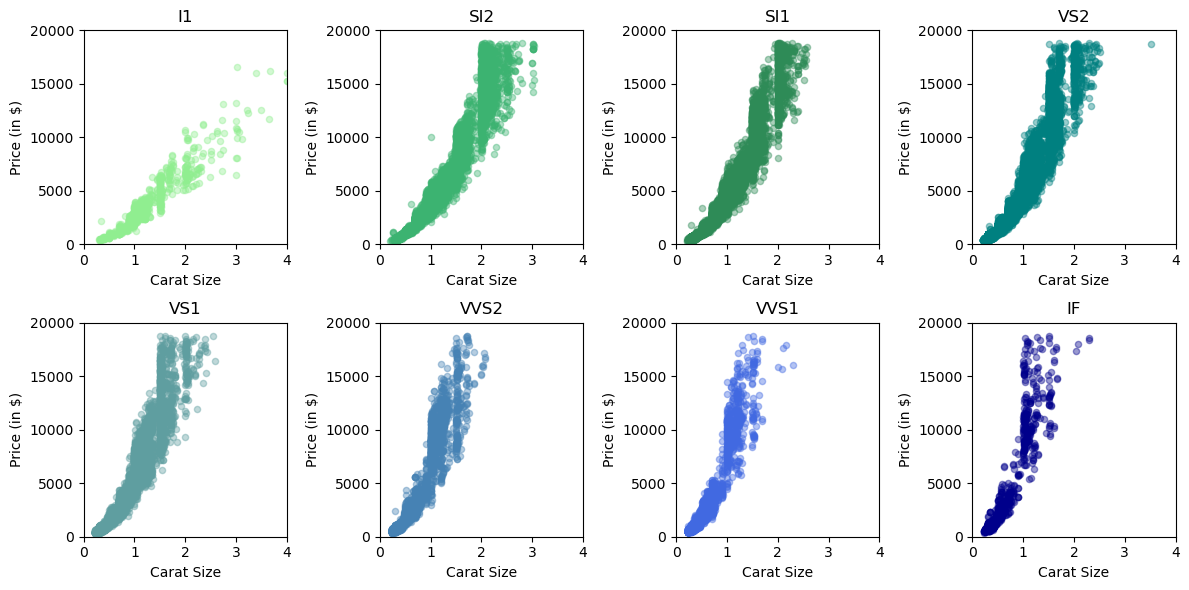

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i, clarity in enumerate(clarity_levels):
    subset = diamonds[diamonds['clarity'] == clarity]
    axes[i].scatter(subset['carat'], subset['price'], s=20, alpha=0.4, color=clarity_pal[i])
    axes[i].set_title(clarity)
    axes[i].set_xlim([0, 4])
    axes[i].set_ylim([0, 20000])
    axes[i].set_xlabel('Carat Size')
    axes[i].set_ylabel('Price (in $)')

plt.tight_layout()
plt.show()


## Part 6: Applying Logarithmic Transformations
We will start by adding two new columns to the diamonds in order to store the transformed variables

In [18]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

We will now display histograms to explore the distribution of the diamond prices and the log-transformed prices.

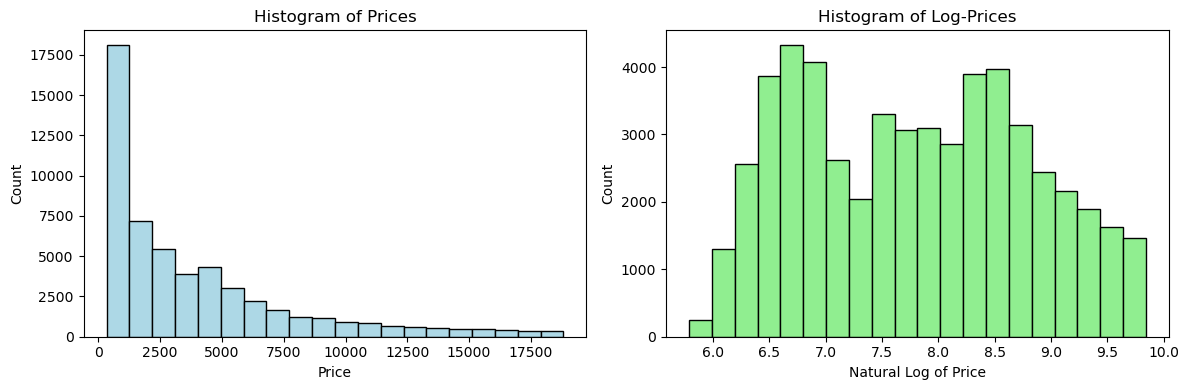

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(diamonds['price'], bins=20, edgecolor='black', color='lightblue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='lightgreen')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.tight_layout()
plt.show()

We will now display histograms to explore the distribution of the carat sizes and the log-transformed carat sizes.

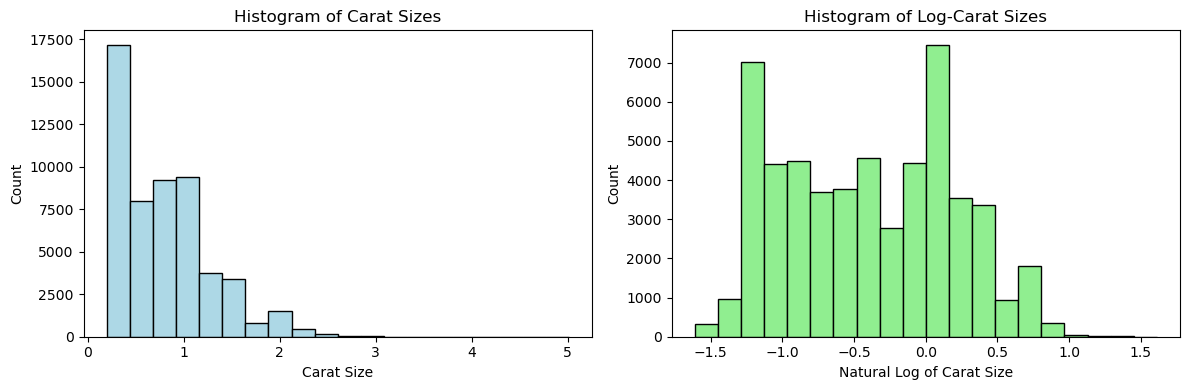

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(diamonds['carat'], bins=20, edgecolor='black', color='lightblue')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='lightgreen')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Sizes')

plt.tight_layout()
plt.show()

## Part 7: Scatterplot of Transformed Variables
We will now create a scatterplot of the transformed variables, ln_price and ln_carat, with points colored by clarity.

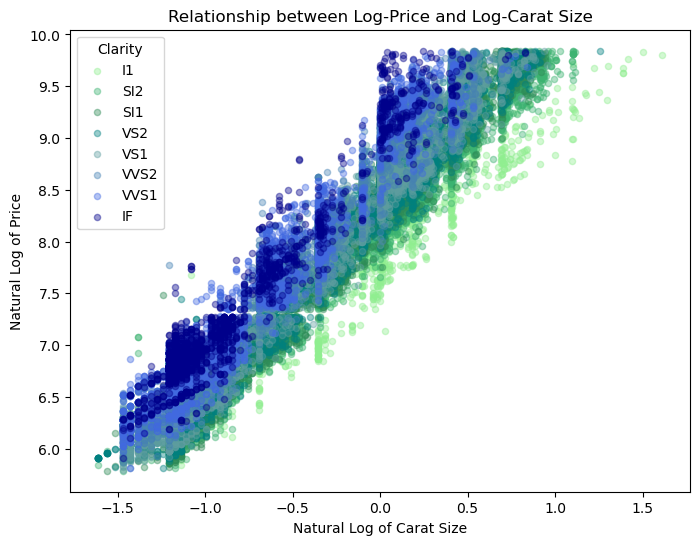

In [21]:
plt.figure(figsize=(8, 6))

for x, clarity in enumerate(clarity_levels):
    subset = diamonds[diamonds['clarity'] == clarity]
    plt.scatter(subset['ln_carat'], subset['ln_price'], s=20, alpha=0.4, label=clarity, color=clarity_pal[x])

plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.legend(title="Clarity")
plt.show()

## Part 8: Grouping by Cut
We will now calculate the mean price and carat size for each level of the cut variable, and visualize the results using bar charts.


In [22]:
gb_cut = diamonds.groupby('cut')[['price', 'carat']].mean()
gb_cut

C:\Users\Player 1\AppData\Local\Temp\ipykernel_16008\3916646161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_cut = diamonds.groupby('cut')[['price', 'carat']].mean()


,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


We will now use bar charts to graphically display the information from the
DataFrame above.

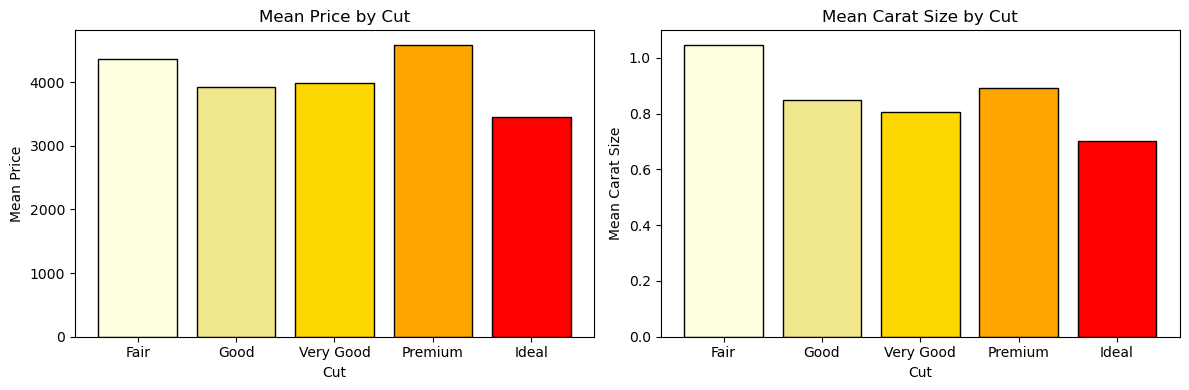

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut['price'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')

plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut['carat'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')

plt.tight_layout()
plt.show()

## Part 9: Grouping by Color
We will now calculate the mean price and carat size for each level of the color variable, and visualize the results using bar charts.

In [24]:
gb_color = diamonds.groupby('color')[['price', 'carat']].mean()
gb_color

C:\Users\Player 1\AppData\Local\Temp\ipykernel_16008\3416390204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_color = diamonds.groupby('color')[['price', 'carat']].mean()


,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


We will now use bar charts to graphically display the information from the
DataFrame above.

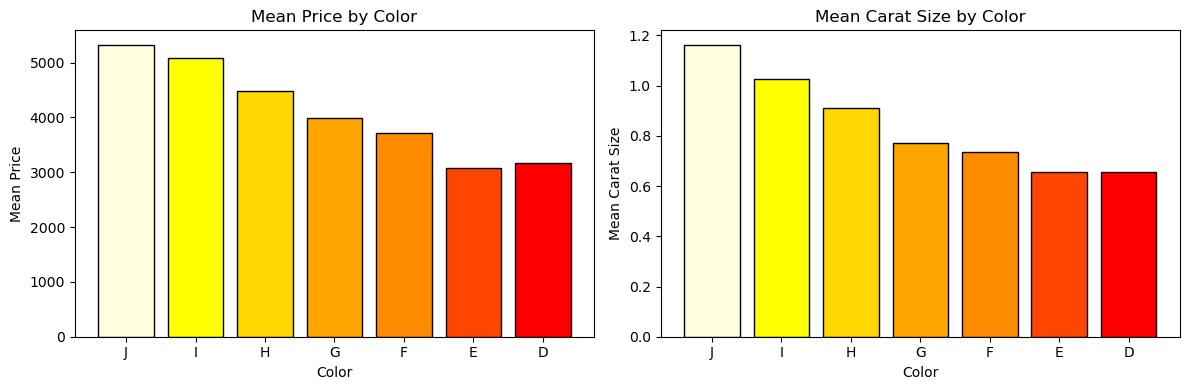

In [25]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(gb_color.index, gb_color['price'], color=color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')

plt.subplot(1, 2, 2)
plt.bar(gb_color.index, gb_color['carat'], color=color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')

plt.tight_layout()
plt.show()

## Part 10: Grouping by Clarity
We will now calculate the mean price and carat size for each

In [26]:
gb_clarity = diamonds.groupby('clarity')[['price', 'carat']].mean()
gb_clarity

C:\Users\Player 1\AppData\Local\Temp\ipykernel_16008\3279681448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_clarity = diamonds.groupby('clarity')[['price', 'carat']].mean()


,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


We will now use bar charts to graphically display the information from the
DataFrame above.

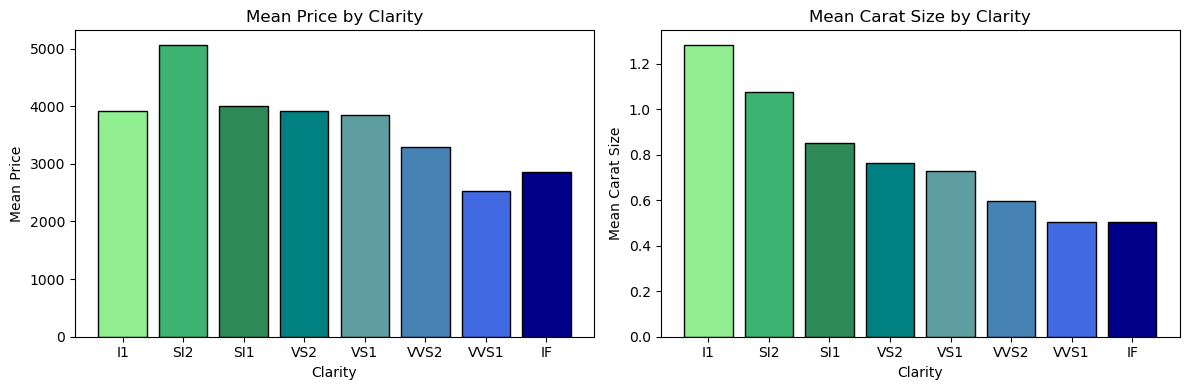

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity['price'], color=clarity_pal, edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')

plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity['carat'], color=clarity_pal, edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')

plt.tight_layout()
plt.show()